
Classical Model Performance:
Accuracy: 0.9770
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.4947

Quantum Model Performance:
Accuracy: 0.9775
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.5395


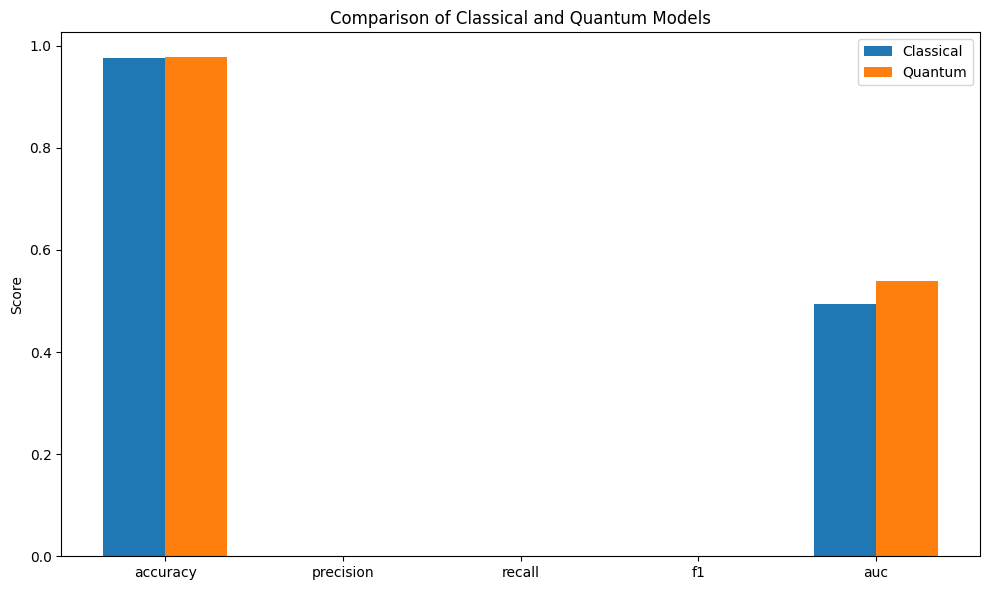

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import joblib

# Load the data
def load_data():
    # Generate synthetic data
    np.random.seed(42)
    n_samples = 10000
    n_features = 10
    X = np.random.randn(n_samples, n_features)
    y = np.random.choice([0, 1], size=n_samples, p=[0.99, 0.01])  # 1% fraud rate
    return X, y

# Create a mock quantum model
class MockQuantumModel:
    def fit(self, X, y):
        pass  # Simulate fitting

    def predict(self, X):
        return np.random.choice([0, 1], size=len(X), p=[0.99, 0.01])  # Mock predictions

    def predict_proba(self, X):
        return np.random.rand(len(X), 2)  # Mock probabilities

# Evaluate a model
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # For AUC, we need probability predictions
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X)[:, 1]
    else:
        y_pred_proba = y_pred
    auc = roc_auc_score(y, y_pred_proba)
    
    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }

# Compare models
def compare_models(classical_results, quantum_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(metrics))
    width = 0.35
    
    ax.bar(x - width/2, [classical_results[m] for m in metrics], width, label='Classical')
    ax.bar(x + width/2, [quantum_results[m] for m in metrics], width, label='Quantum')
    
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Classical and Quantum Models')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load data
    X, y = load_data()
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Load classical model
    classical_model = DecisionTreeClassifier(random_state=42)
    classical_model.fit(X_train_scaled, y_train)
    
    # Create a mock quantum model
    quantum_model = MockQuantumModel()
    quantum_model.fit(X_train_scaled, y_train)
    
    # Evaluate models
    classical_results = evaluate_model(classical_model, X_test_scaled, y_test, "Classical")
    quantum_results = evaluate_model(quantum_model, X_test_scaled, y_test, "Quantum")
    
    # Compare models
    compare_models(classical_results, quantum_results)

if __name__ == "__main__":
    main()
